## Logistic Regression

In [112]:
import matplotlib.pyplot as plt
import numpy as np

In [113]:
def sigmoid(X):
    return 1/(1 + np.e**(-1*X))

def hypothesis(X, theta):
    hy = np.zeros(X.shape[0])
    for i in range(len(theta)):
        hy+=theta[i]*X[:, i]
    return sigmoid(hy)

##assignment
#write a function called bce(X, theta, y) => the binary crossentropy loss of the current theta
def bce(X, theta, y):
    pass # <= code


def accuracy(X, theta, y_true):
    y_pred = hypothesis(X, theta)
    y_class = (y_pred >= 0.5).astype("int32")
    return np.mean(y_true == y_class)

def grad(X, y, j, theta):
    # gradient of loss wrt jth theta
    y_pred = hypothesis(X, theta)
    return -2*((y - y_pred)*X[:, j]).mean()

def gradient_descent(X, y, lr=0.001, n_epochs=1000):
    theta = np.random.randn(X.shape[1])
    n_features = X.shape[1]
    
    for i in range(n_epochs):
        gradients = np.zeros_like(theta)
        for j in range(n_features):
            gradients[j] = grad(X, y, j, theta)
        
        theta = theta - lr*gradients
        if i % 100 == 0:
            print(f"Accuracy at epoch {i+1} is {accuracy(X, theta, y)}")
    return theta

In [156]:
from sklearn.datasets import make_classification, make_blobs

In [165]:
# X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=100)

In [166]:
X, y = make_blobs(n_samples=500, n_features=2, centers=2, random_state=42)

In [177]:
# plt.scatter(X[:, 0], X[:, 1], c=y)
# plt.show()

In [168]:
X.shape, y.shape

((500, 2), (500,))

In [169]:
X = (X - X.mean(axis=0))/X.std(axis=0)

In [170]:
X = np.hstack([np.ones((X.shape[0], 1)), X])

In [171]:
theta = gradient_descent(X, y, lr=0.07)

Accuracy at epoch 1 is 0.5
Accuracy at epoch 101 is 1.0
Accuracy at epoch 201 is 1.0
Accuracy at epoch 301 is 1.0
Accuracy at epoch 401 is 1.0
Accuracy at epoch 501 is 1.0
Accuracy at epoch 601 is 1.0
Accuracy at epoch 701 is 1.0
Accuracy at epoch 801 is 1.0
Accuracy at epoch 901 is 1.0


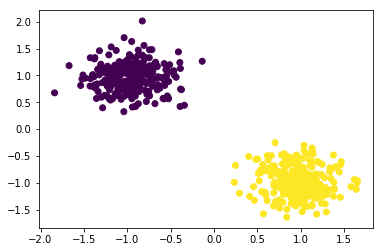

In [173]:
plt.scatter(X[:, 1], X[:, 2], c=y)
plt.show()

In [174]:
m = -theta[1]/theta[2]
b = -theta[0]/theta[2]

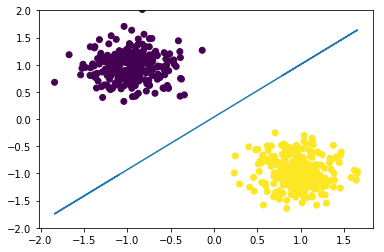

In [176]:
plt.scatter(X[:, 1], X[:, 2], c=y)
plt.plot(X[:, 1], (m*X[:, 1] + b))
plt.ylim(-2, 2)
plt.show()